In [80]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import scipy
from scipy.fftpack import fft

# Import cell
In order to run the code, comment this cell and import the audio file and filter from your device

In [81]:
from IPython.display import Audio
from google.colab import drive
drive.mount('/content/drive')
sampling_rate_orig, data_orig = wavfile.read("/content/drive/My Drive/Signal2/Ghayegh2.wav") #import the wav file
path  = '/content/drive/My Drive/Signal2/filt_taps.mat'
init_data = scipy.io.loadmat(path)
data = init_data['filt_taps'].flatten()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
data_orig = (data_orig - np.mean(data_orig)) / np.std(data_orig) * 0.2
noise = np.random.normal(0,1,data_orig.shape[0])
noisy_data = data_orig + noise / 15

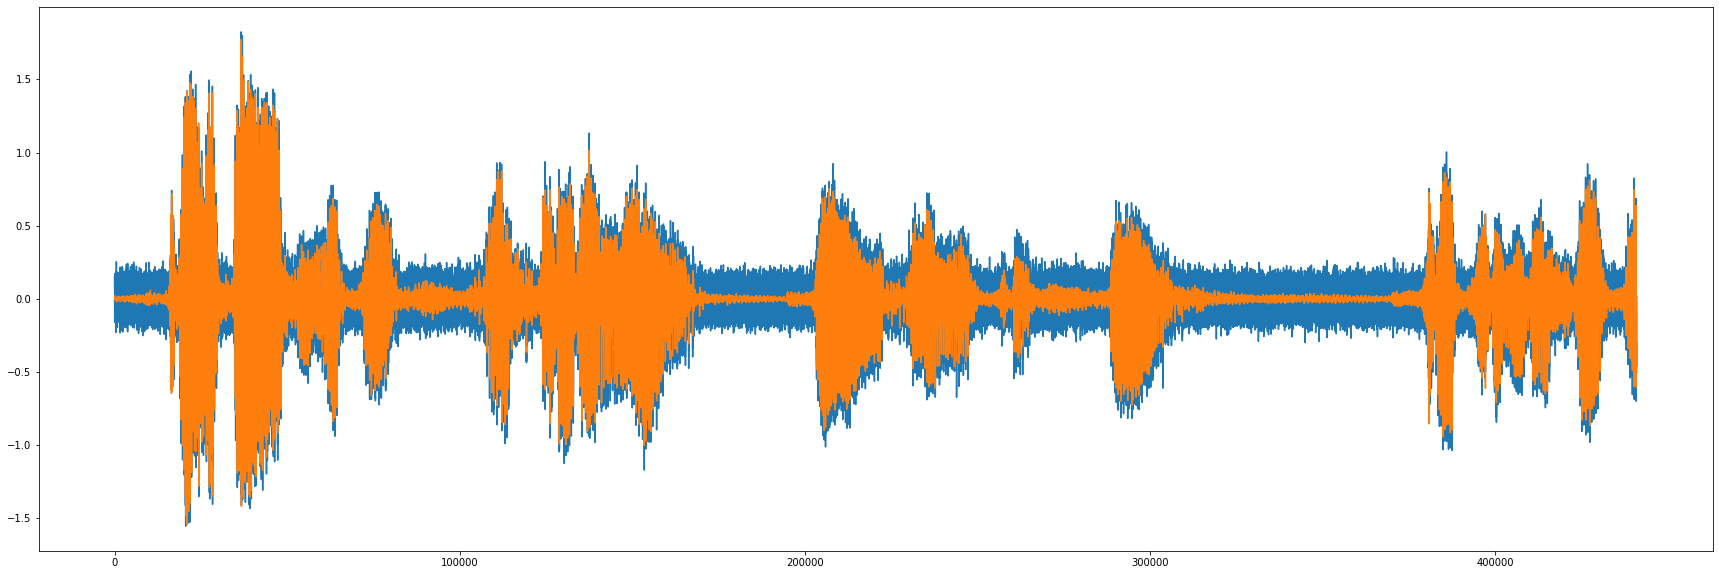

In [83]:
plt.figure(figsize = (30,10))
plt.plot(noisy_data)
plt.plot(data_orig)

In [84]:
def make_fft(data):
    f_t =np.abs(np.fft.fft(data))
    x = np.linspace(- np.pi, np.pi, num=f_t.shape[0])
    return x, f_t

In [85]:
t = np.linspace(0,10, num = data_orig.shape[0])
carrier = np.cos(2 * np.pi * 6500 * t)
modulated_signal  = np.multiply(carrier, data_orig)

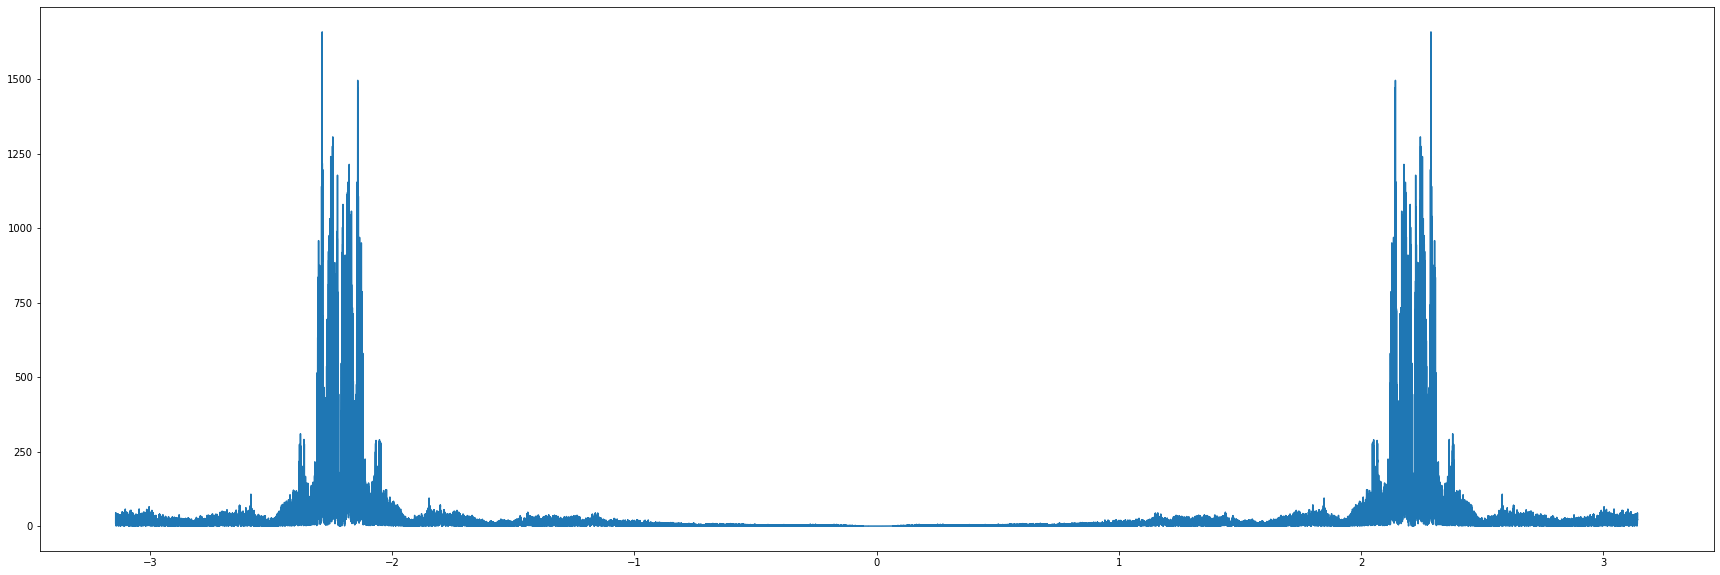

In [86]:
plt.figure(figsize = (30,10))
x_modulated, f_t_modulated = make_fft(modulated_signal)
plt.plot(x_modulated, f_t_modulated)

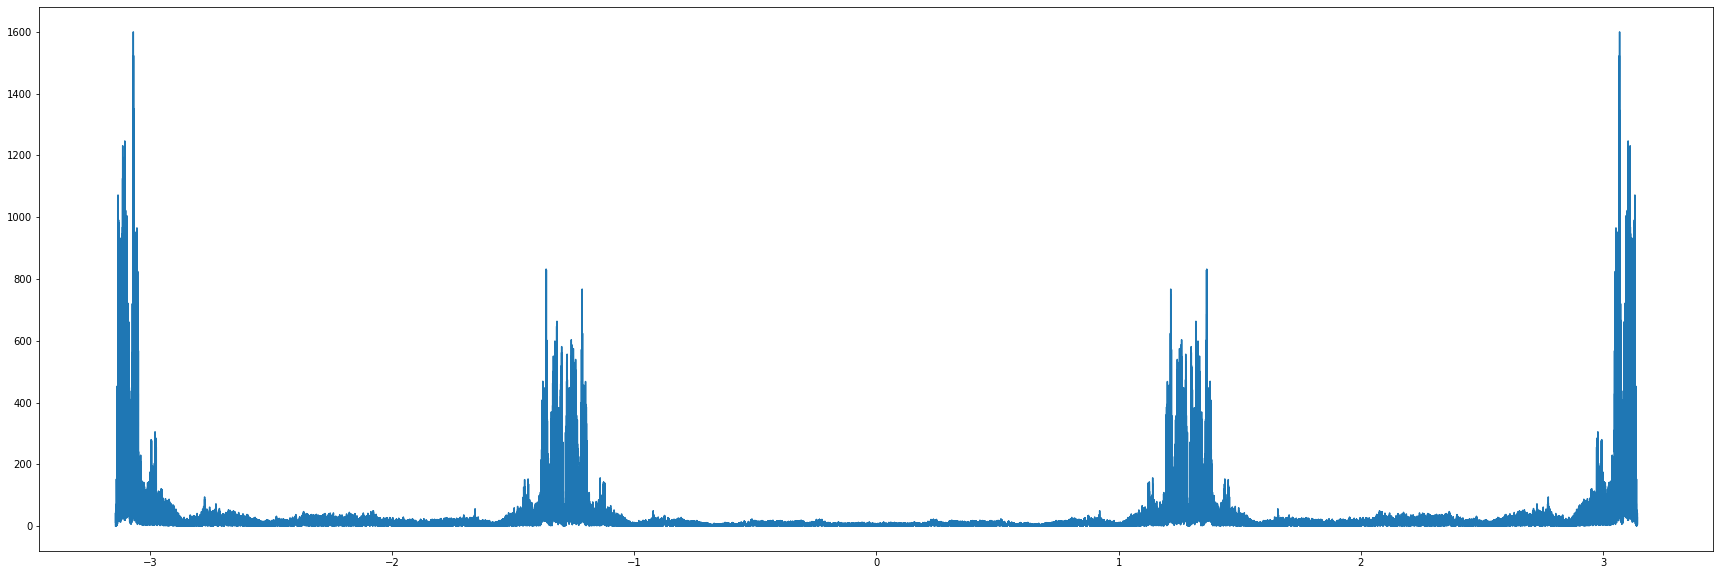

In [88]:
Demodulated_signal = np.multiply(carrier, modulated_signal)
plt.figure(figsize = (30,10))
x_demoulated, f_t_demodulated = make_fft(Demodulated_signal)
plt.plot(x_demoulated, f_t_demodulated)

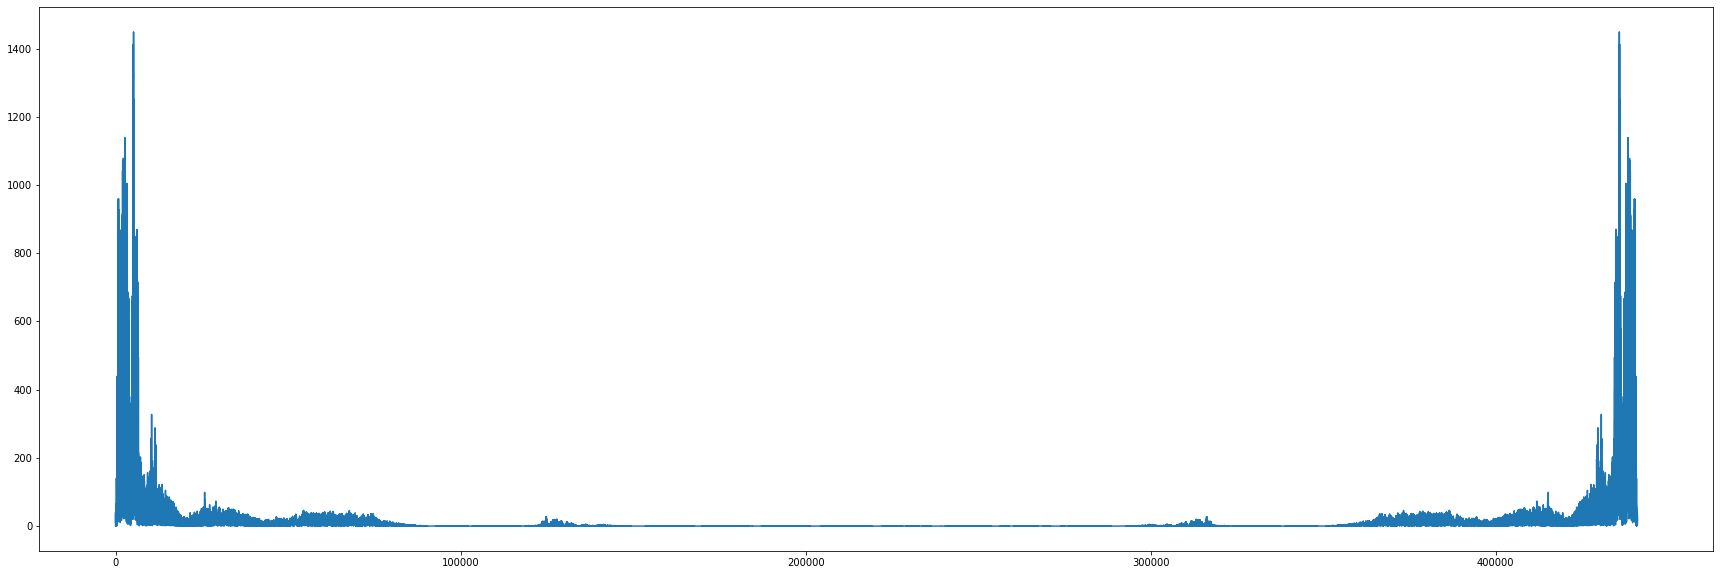

In [89]:
convolved = np.convolve(Demodulated_signal, data)
plt.figure(figsize = (30,10))
f_t =np.abs(np.fft.fft(convolved))
plt.plot(f_t)
# plt.figure(figsize = (30,10))
# g_t =np.abs(np.fft.fft(data))
# plt.plot(g_t)

In [90]:
# drive.mount('/content/drive')
# wavfile.write('/content/drive/My Drive/Signal2/Ghayegh_n.wav', sampling_rate_orig, noisy_data)
# wavfile.write('/content/drive/My Drive/Signal2/modulated_signal.wav', sampling_rate_orig, modulated_signal)
# wavfile.write('/content/drive/My Drive/Signal2/filtered.wav', sampling_rate_orig, convolved)
# wavfile.write('/content/drive/My Drive/Signal2/Demodulated_signal.wav', sampling_rate_orig, Demodulated_signal)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
